In [2]:
import numpy as np
import matplotlib
from matplotlib import pyplot

In [48]:
# task: find the probability for height 1.735 < x < 1.775, under normal distribution

# build an approximating polynomial for the PDF using the Hermite interpolation method

def Hermite(zn, Q, n):
    for i in range(0, n+1):
        if i > 0:
            Q[2*i, 1] = (Q[2*i,0]-Q[2*i-1,0])/(zn[2*i]-zn[2*i-1])
    for i in range(2, 2*n+2):
        for j in range(2, i+1):
            Q[i,j] = (Q[i, j-1]-Q[i-1,j-1])/(zn[i]-zn[i-j])
    return(Q)

# pick two points for the interpolation, x1 = 1, x2 = 2, calculate the corresponding f(x1) and f(x2)
x1n = 1.735
x2n = 1.775
fx1n = np.exp(-0.5*((x1n-mu)/sigma)**2)/(np.sqrt(2*np.pi)*sigma)
fx2n = np.exp(-0.5*((x2n-mu)/sigma)**2)/(np.sqrt(2*np.pi)*sigma)
ffx1n = ((mu-x1n)*np.exp(-0.5*((x1n-mu)/sigma)**2))/(np.sqrt(2*np.pi)*sigma**3)
ffx2n = ((mu-x2n)*np.exp(-0.5*((x2n-mu)/sigma)**2))/(np.sqrt(2*np.pi)*sigma**3)
fx_matrix_n = np.array([[fx1n,0,0,0], 
              [fx1n,ffx1n,0,0],
              [fx2n,0,0,0],
              [fx2n,ffx2n,0,0]])
x_values_n = [x1n,x1n,x2n,x2n]

In [45]:
# raw data 1

heights = np.random.normal(1.79, 0.06, 100)
heights.sort()
print(heights)

[1.64534599 1.65817057 1.66061689 1.67227946 1.69227117 1.70282419
 1.7118457  1.71317887 1.71450345 1.71715039 1.71739572 1.71949874
 1.71951181 1.72015941 1.72148484 1.72681889 1.73229472 1.73309535
 1.73377934 1.73508524 1.74534428 1.74725664 1.74997234 1.75035693
 1.75155531 1.75428735 1.7562208  1.75671668 1.75926438 1.76321117
 1.7632474  1.76337289 1.76341446 1.76348653 1.76502977 1.76663298
 1.76769322 1.76791915 1.7804411  1.78195176 1.78341352 1.7874125
 1.7883261  1.78835371 1.78956457 1.78974379 1.79027981 1.79125473
 1.79144191 1.79312606 1.79507188 1.79521966 1.79549794 1.79780572
 1.79942202 1.80039964 1.80067157 1.80131929 1.80463348 1.8057203
 1.8065255  1.80689865 1.807383   1.80740545 1.80906375 1.8100237
 1.81155498 1.81215171 1.81488059 1.81883995 1.81913853 1.82087365
 1.8209388  1.82129068 1.82572313 1.83172003 1.83194492 1.83264746
 1.83570174 1.83623452 1.83780792 1.84318508 1.84581347 1.84618181
 1.8519362  1.85778969 1.85959694 1.86184    1.86321841 1.8672249

In [103]:
# direct test
counter_h = 0
for i in range(len(heights)):
    if heights[i] >= 1.735 and heights[i] <= 1.775:
        counter_h += 1
p_heights = counter_h/len(heights)
print(p_heights)

0.19


In [46]:
mu = heights.mean()
mu

1.7911008338851035

In [47]:
sigma = heights.std()
sigma

0.05864778661373994

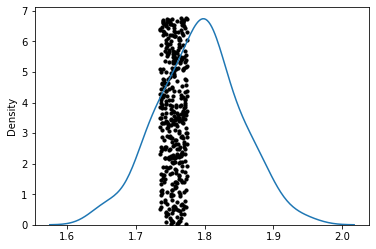

In [53]:
sea.kdeplot(heights)
seed = 400
for i in range(seed): 
    x = np.random.uniform(1.735,1.775,1)
    y = np.random.uniform(0,6.8,1)
    pyplot.scatter(x,y,color="black",s=10)


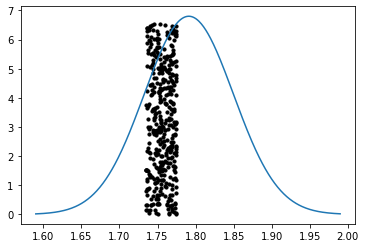

In [57]:
n = np.linspace(1.59, 1.99, 400)
pyplot.plot(n, np.exp(-0.5*((n-mu)/sigma)**2)/(np.sqrt(2*np.pi)*sigma))
for i in range(seed): 
    x = np.random.uniform(1.735,1.775,1)
    y = np.random.uniform(0,np.exp(-0.5*((1.775-mu)/sigma)**2)/(np.sqrt(2*np.pi)*sigma),1)
    pyplot.scatter(x,y,color="black",s=10)


In [94]:
def MC_apn(seed, mu, sigma, trials):
    areas = []
    for j in range(trials): 
        totaln = 0
        for i in range(seed): 
            x = np.random.uniform(1.735,1.775,1)
            y = np.random.uniform(0,np.exp(-0.5*((1.775-mu)/sigma)**2)/(np.sqrt(2*np.pi)*sigma),1)
            if y < np.exp(-0.5*((x-mu)/sigma)**2)/(np.sqrt(2*np.pi)*sigma):
                totaln += 1
        pn = totaln/seed
        area = pn*(1.775-1.735)*np.exp(-0.5*((1.775-mu)/sigma)**2)/(np.sqrt(2*np.pi)*sigma)
        areas.append(area)
    return(np.mean(areas))
MC_apn(seed, mu, sigma, 25)                                                                 

0.22450793257197943

In [96]:
Hermite(x_values_n, fx_matrix_n, 1)
# the approximating polynomial we want is
# 4.30489118 + 70.2147319(x-1.735) - 351.695072(x-1.735)^2 - 7134.07645(x-1.735)^2(x-1.775)

array([[ 4.30489118e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 4.30489118e+00,  7.02147319e+01,  0.00000000e+00,
         0.00000000e+00],
       [ 6.55076834e+00,  5.61469290e+01, -3.51695072e+02,
         0.00000000e+00],
       [ 6.55076834e+00,  3.06646038e+01, -6.37058130e+02,
        -7.13407645e+03]])

In [97]:
# to verify my results(Composite Simpson's Rule)

def CSintegral_n(a, b, n):
    h = (b-a)/n
    fa = 4.30489118 + 70.2147319*(a-1.735) - 351.695072*(a-1.735)**2 - 7134.07645*(a-1.775)*(a-1.735)**2
    fb = 4.30489118 + 70.2147319*(b-1.735) - 351.695072*(b-1.735)**2 - 7134.07645*(b-1.775)*(b-1.735)**2
    xi0 = fa + fb
    xi1 = 0
    xi2 = 0
    for i in range(1, n):
        X = a + i*h
        if i % 2 == 0:
            xi2 += 4.30489118 + 70.2147319*(X-1.735) - 351.695072*(X-1.735)**2 - 7134.07645*(X-1.775)*(X-1.735)**2
        else:
            xi1 += 4.30489118 + 70.2147319*(X-1.735) - 351.695072*(X-1.735)**2 - 7134.07645*(X-1.775)*(X-1.735)**2
    xi = h*(xi0 + 2*xi2 + 4*xi1)/3
    return(xi)

In [98]:
CSintegral_n(1.735, 1.775, 8)

0.2223865408266654

In [99]:
def CSintegral_n_test(a, b, n, mu, sigma):
    h = (b-a)/n
    fa = np.exp(-0.5*((a-mu)/sigma)**2)/(np.sqrt(2*np.pi)*sigma)
    fb = np.exp(-0.5*((b-mu)/sigma)**2)/(np.sqrt(2*np.pi)*sigma)
    xi0 = fa + fb
    xi1 = 0
    xi2 = 0
    for i in range(1, n):
        X = a + i*h
        if i % 2 == 0:
            xi2 += np.exp(-0.5*((X-mu)/sigma)**2)/(np.sqrt(2*np.pi)*sigma)
        else:
            xi1 += np.exp(-0.5*((X-mu)/sigma)**2)/(np.sqrt(2*np.pi)*sigma)
    xi = h*(xi0 + 2*xi2 + 4*xi1)/3
    return(xi)

In [100]:
CSintegral_n_test(1.735, 1.775, 6, mu, sigma)

0.2224455243454577

In [24]:
# task: find the probability for days of interval 30 < x < 61, under exponential distribution

# build an approximating polynomial for the PDF using the Hermite interpolation method

def Hermite(zn, Q, n):
    for i in range(0, n+1):
        if i > 0:
            Q[2*i, 1] = (Q[2*i,0]-Q[2*i-1,0])/(zn[2*i]-zn[2*i-1])
    for i in range(2, 2*n+2):
        for j in range(2, i+1):
            Q[i,j] = (Q[i, j-1]-Q[i-1,j-1])/(zn[i]-zn[i-j])
    return(Q)

# pick two points for the interpolation, x1 = 1, x2 = 2, calculate the corresponding f(x1) and f(x2)
x1e = 30
x2e = 61
fx1e = rate*np.exp(-1*rate*x1e)
fx2e = rate*np.exp(-1*rate*x2e)
ffx1e = (-1*rate**2)*np.exp(-1*rate*x1e)
ffx2e = (-1*rate**2)*np.exp(-1*rate*x2e)
fx_matrix_e = np.array([[fx1e,0,0,0], 
              [fx1e,ffx1e,0,0],
              [fx2e,0,0,0],
              [fx2e,ffx2e,0,0]])
x_values_e = [x1e,x1e,x2e,x2e]


In [60]:
import seaborn as sea
interval = (365*3+366*2)/(9+10+17+7+16)
print(interval)

30.966101694915253


In [19]:
# generate raw data 2

days = np.random.exponential(interval, 100)
days.sort()
seed = 400
days

array([2.42157260e-01, 3.78895835e-01, 8.07461071e-01, 1.35691340e+00,
       1.49418607e+00, 2.79548097e+00, 3.77606454e+00, 3.84980911e+00,
       3.97594851e+00, 4.36771630e+00, 4.68266381e+00, 5.18771256e+00,
       5.96372899e+00, 6.35940229e+00, 6.46801301e+00, 6.52276044e+00,
       6.69460825e+00, 7.61791483e+00, 7.67124396e+00, 8.56624306e+00,
       8.93469595e+00, 1.00152286e+01, 1.10017159e+01, 1.11326971e+01,
       1.13768963e+01, 1.15666272e+01, 1.17839934e+01, 1.20323894e+01,
       1.24368567e+01, 1.27479639e+01, 1.27707267e+01, 1.28094994e+01,
       1.29305581e+01, 1.32828906e+01, 1.35110934e+01, 1.45599480e+01,
       1.50849019e+01, 1.54467620e+01, 1.63221505e+01, 1.65943588e+01,
       1.69650625e+01, 1.73537368e+01, 1.77785179e+01, 1.78064638e+01,
       1.90403342e+01, 1.98055366e+01, 2.05646541e+01, 2.07923087e+01,
       2.09616890e+01, 2.42479129e+01, 2.68042840e+01, 2.80249816e+01,
       2.86884511e+01, 2.89892789e+01, 2.98146703e+01, 3.00055941e+01,
      

In [105]:
# direct test
counter_d = 0
for i in range(len(days)):
    if days[i] >= 30 and days[i] <= 61:
        counter_d += 1
p_days = counter_d/len(days)
print(p_days)

0.28


In [20]:
av_day = np.mean(days)
rate = 1/av_day
av_day

35.67338889744974

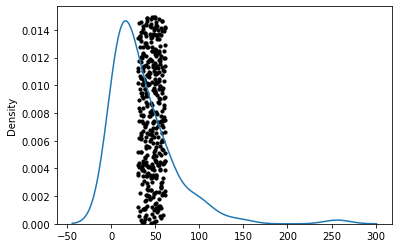

In [22]:
sea.kdeplot(days)
total_e = 0
for i in range(seed): 
    x = np.random.uniform(30,61,1)
    y = np.random.uniform(0,0.015,1)
    if y < rate*np.exp((-1)*rate*x):
        total_e += 1
    pyplot.scatter(x,y,color="black",s=10)

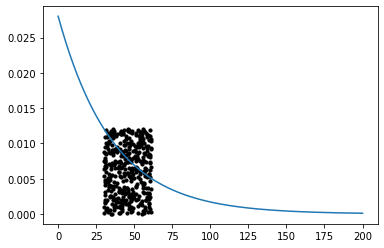

In [54]:
n = np.linspace(0, 200, 400)
pyplot.plot(n, rate*np.exp(-1*rate*n))
for i in range(seed): 
    x = np.random.uniform(30,61,1)
    y = np.random.uniform(0,rate*np.exp(-1*rate*30),1)
    pyplot.scatter(x,y,color="black",s=10)



In [64]:
def MC_ape(seed, rate, trials):
    areas = []
    for j in range(trials): 
        totale = 0
        for i in range(seed): 
            x = np.random.uniform(30,61,1)
            y = np.random.uniform(0,rate*np.exp(-1*rate*30),1)
            if y < rate*np.exp((-1)*rate*x):
                totale += 1
        pe = totale/seed
        area = pe*(61-30)*rate*np.exp(-1*rate*30)
        areas.append(area)
    return(np.mean(areas))
MC_ape(seed, rate, 20)

0.25073667051117743

In [32]:
Hermite(x_values_e, fx_matrix_e, 1)
# approximating polynomial is 0.0120901042 - 0.000338911008(x-30)+3.62788502*10^(-6)*(x-30)^2
# the coefficient of the last term is trivial, thus dropped

array([[ 1.20901042e-02,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 1.20901042e-02, -3.38911008e-04,  0.00000000e+00,
         0.00000000e+00],
       [ 5.07026044e-03, -2.26446572e-04,  3.62788502e-06,
         0.00000000e+00],
       [ 5.07026044e-03, -1.42130047e-04,  2.71988790e-06,
        -2.92902295e-08]])

In [1]:
# verify by using integral

def CSintegral_e(a, b, n):
    h = (b-a)/n
    fa = 0.0120901042 - 0.000338911008*(a-30)+3.62788502*((a-30)**2)*10**(-6)
    fb = 0.0120901042 - 0.000338911008*(b-30)+3.62788502*((b-30)**2)*10**(-6)
    xi0 = fa + fb
    xi1 = 0
    xi2 = 0
    for i in range(1, n):
        X = a + i*h
        if i % 2 == 0:
            xi2 += 0.0120901042 - 0.000338911008*(X-30)+3.62788502*((X-30)**2)*10**(-6)
        else:
            xi1 += 0.0120901042 - 0.000338911008*(X-30)+3.62788502*((X-30)**2)*10**(-6)
    xi = h*(xi0 + 2*xi2 + 4*xi1)/3
    return(xi)

In [2]:
CSintegral_e(30,61,4)

0.2479725983996067

In [35]:
def CSintegral_e_test(a, b, n, rate):
    h = (b-a)/n
    fa = rate*np.exp(-1*rate*a)
    fb = rate*np.exp(-1*rate*b)
    xi0 = fa + fb
    xi1 = 0
    xi2 = 0
    for i in range(1, n):
        X = a + i*h
        if i % 2 == 0:
            xi2 += rate*np.exp(-1*rate*X)
        else:
            xi1 += rate*np.exp(-1*rate*X)
    xi = h*(xi0 + 2*xi2 + 4*xi1)/3
    return(xi)

In [36]:
CSintegral_e_test(30, 61, 4, rate)

0.25042469724174826

In [37]:
print(rate)

0.028032099862300694
